OpenCV provides two transformation functions **cv2.warpAffine** and **cv2.warpPrespective**, with which you can have all kind of transformations. wapraffine takes a 2 x 3 transformation matrix as input, while warpPerspective takes a 3x3 transformation matrix as input. 



## Scaling

scaling is just the resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. the size of the image can be specified manually, or we can specify the scaling factor. different interpolation methods are used such as inter_are for shrinking adn inter_cubic and inter_linear for zooming. by default, interpolation method used is inter_linear for all resizing purposes. 

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./sample_imgs/rasenshuriken.jpeg')
res = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

In [3]:
height, width = img.shape[:2]
res = cv2.resize(img, (2*width, 2 * height), interpolation = cv2.INTER_CUBIC)

## Translation

it is the shifting of objects location. if the shifting is known, then the transformation matrix is created. this can be made into a numpy array of type np.float32 and passed to cv2.warpAffine(). 



In [4]:
import cv2
import numpy as np

In [5]:
img = cv2.imread('./sample_imgs/rasenshuriken.jpeg',0)
rows, cols = img.shape

In [6]:
M = np.float32([[1,0,100], [0,1,50]])
dst = cv2.warpAffine(img, M, (cols, rows))
# the third argumetn is the size of the output image, not what is hidden

In [7]:
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

2025-01-19 14:38:04.030 python[3254:212514] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-19 14:38:04.030 python[3254:212514] +[IMKInputSession subclass]: chose IMKInputSession_Modern


## Rotation


rotaiton for an image for an angle is achieved by a trasnformation matrix of the form:- 
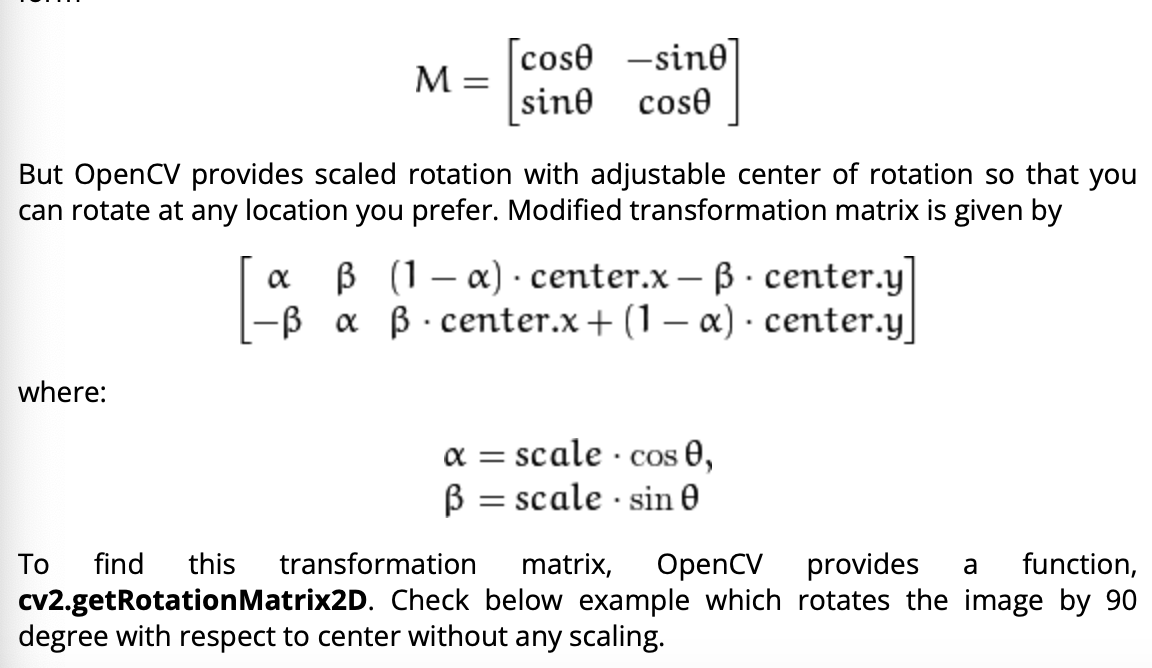

In [9]:
img = cv2.imread('./sample_imgs/rasenshuriken.jpeg', 0)
rows, cols = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine(img, M, (cols, rows))

In [10]:
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Affine transformation

all parallel lines in the orignal image will still be parallel in the output image. to find the transformation matrix, we need three points from the inputimage and their corresponding locations inthe output image. then we get a **cv2.getAffineTransform** to create a 2 x 3 matrix which is to be passed to **cv2.warpAffine**

In [12]:
img = cv2.imread('./sample_imgs/rasenshuriken.jpeg')
rows, cols, ch = img.shape

In [13]:
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200, 50], [100, 250]])

In [14]:
M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M ,(cols, rows))

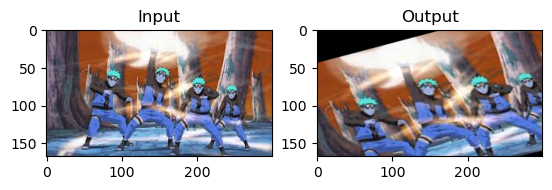

In [18]:
import matplotlib.pyplot as plt
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

##  perspective transformation

for this we need a 3 x 3 transformaiton matrix. striaght lines will remain straight een after the transformation. to find this, we need to find 4 points in the input image and the corresponding points on the output image. among these 4 points, 3 of them should not be collinear. 

this martix can be found by the function cv2.getPerspective Transfomr, and then passed to cv2.warpPerspective with this 3 